# Thread based parallelism comparison using the "PSUM" example.

### Abstract
The GraviT team has created a kernel called *PSUM* to explore thread based parallel strategies. 
We present a comparison of suggested parallel methods. The conclusions are derived from performance experiements with a single executable per implementation.  This is to removed the possibility of cache reuse from a previous implementation run.  Secondly, we ran the implemenation executable 100 times under a python script (*subprocess*) to alleviate any memory reuse from the previous interation with the intent of independent trials.  The results suggest more attention to **OpenMp** implementations should be explored for the GraviT framework with regards to array manipulation. 

Load in modules for data post processing. 

In [1]:
%matplotlib inline
import sys,os,getopt,argparse,math
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()


## Serial executable. 

In [2]:
mavSerialList=[]
with open('maverick_serial') as f:
    for line in f:
      mavSerialList.append(float(line.split()[1]))
mavSerialArray=np.asarray(mavSerialList)

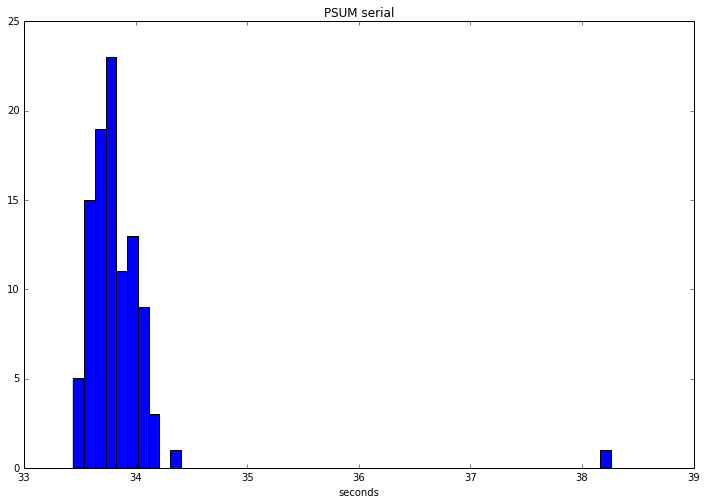

PSUM serial average is 33.84031
PSUM serial standard deviation is 0.481275507688


In [66]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(mavSerialArray,50)
plt.xlabel('seconds')
plt.title('PSUM serial')
plt.show()
print 'PSUM serial average is' ,np.average(mavSerialArray)
print 'PSUM serial standard deviation is',np.std(mavSerialArray)


The above distribution for the serial implementation shows a noticable variance.  

In [4]:
#fastOpenMP1_data=np.array(filter(lambda x: x <= 42., dataArray))

### Distriubtion plots generation

In [70]:
testList=['serial','stdVec','openmp','openmp-2','tbb_rankBuffer','tbb_singleBuffer']
threadCount=[1,2,4,8,10,12,14,16,18,19,20,25,30,35,40]
dataListDict={}
dataArrayDict={}
for test in testList[1:]:
    for thread in threadCount:
        listPre='maverick_' + test + '_' + str(thread) 
        dataFileName=listPre + '.txt'
        listName=listPre
        dataListDict[listName]=[]
        with open(dataFileName) as f:
          for line in f:
            #print line
            if "tbb" in test:
              dataListDict[listName].append(float(line.split()[4]))
            else:
              dataListDict[listName].append(float(line.split()[2]))
for key in dataListDict:
    dataArrayDict[key]=np.asanyarray(dataListDict[key])

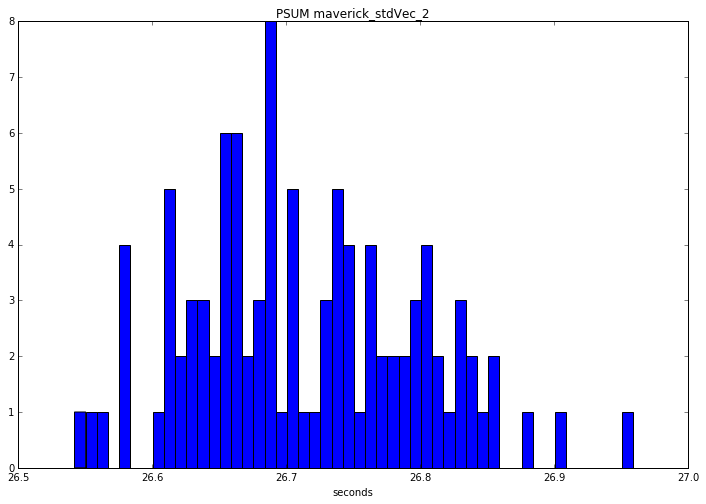

In [71]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='maverick_stdVec_2'
ax.hist(dataArrayDict[dk],50)
plt.xlabel('seconds')
plt.title('PSUM '+ dk)
plt.show()

Users can change the above *dk* value to other distributions.  Try '*OpenMp_1*' and see an experiment that demonstrates NUMA effects.

## Compare Implemenations.

We will create data structures for both the many single executable experiments and the single file *PSUM.cpp* and plot their respective comparisons.

In [55]:
orgListDict={}
orgArrayDict={}
with open('maverick_psum.txt') as f:
    for line in f:
        if 'non-parallel' in line:
            orgListDict['non-parallel']=float(line.split()[1])
        if 'std' in line:
            orgListDict['stdVec_' + line.split()[1]]=float(line.split()[2])
        if 'openmp' in line:
            orgListDict['openMp_' + line.split()[1].strip(':')]=float(line.split()[2])
        if 'tbb single' in line:
            orgListDict['tbb_singleBuffer_' + line.split()[3].strip(':')]=float(line.split()[4])
        if 'tbb rank' in line:
            orgListDict['tbb_rankBuffer_' + line.split()[3].strip(':')]=float(line.split()[4])
for key in orgListDict:
    orgArrayDict[key]=np.asanyarray(orgListDict[key])

Let's create data lists for the original and distribution results

In [58]:
orgStdVec=[]
orgOpenMp=[]
orgTbbRank=[]
orgTbbSingle=[]
for key in orgArrayDict:
    if 'stdVec' in key:
        orgStdVec.append((np.average(orgArrayDict[key]),key.split("_")[-1]))
        orgStdVec.sort(key=lambda tup: int(tup[1]))
    if 'openMp' in key:
        orgOpenMp.append((np.average(orgArrayDict[key]),key.split("_")[-1]))
        orgOpenMp.sort(key=lambda tup: int(tup[1]))
    if 'tbb_rankBuffer' in key:
        orgTbbRank.append((np.average(orgArrayDict[key]),key.split("_")[-1]))
        orgTbbRank.sort(key=lambda tup: int(tup[1]))
    if 'tbb_singleBuffer' in key:
        orgTbbSingle.append((np.average(orgArrayDict[key]),key.split("_")[-1]))
        orgTbbSingle.sort(key=lambda tup: int(tup[1]))

In [59]:
stdVec=[]
openMp=[]
openMp2=[]
tbbRank=[]
tbbSingle=[]
for key in dataArrayDict:
    if 'stdVec' in key:
        stdVec.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        stdVec.sort(key=lambda tup: int(tup[1]))
    if key.split("_")[1]=='openmp':
        openMp.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        openMp.sort(key=lambda tup: int(tup[1]))
    if key.split("_")[1]=='openmp-2':
        openMp2.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        openMp2.sort(key=lambda tup: int(tup[1]))
    if 'tbb_rankBuffer' in key:
        tbbRank.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        tbbRank.sort(key=lambda tup: int(tup[1]))
    if 'tbb_singleBuffer' in key:
        tbbSingle.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        tbbSingle.sort(key=lambda tup: int(tup[1]))

Plot the original single run timings.

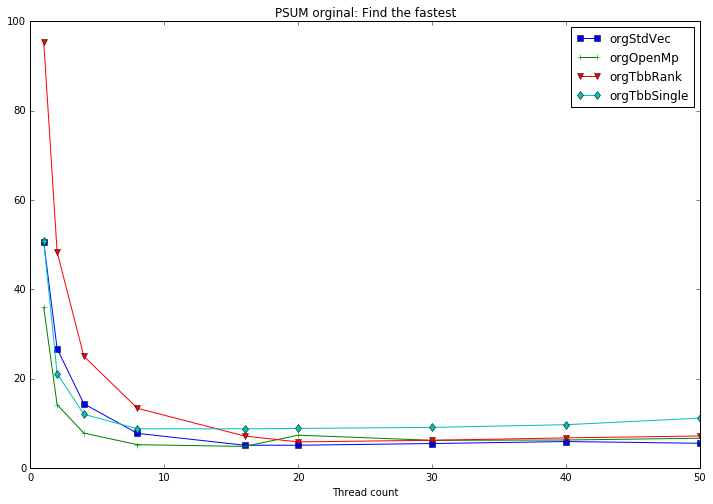

In [60]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Find the fastest'
ax.plot([x[1] for x in orgStdVec],[x[0] for x in orgStdVec],'s-',label='orgStdVec')
ax.plot([x[1] for x in orgOpenMp],[x[0] for x in orgOpenMp],'+-',label='orgOpenMp')
ax.plot([x[1] for x in orgTbbRank],[x[0] for x in orgTbbRank],'v-',label='orgTbbRank')
ax.plot([x[1] for x in orgTbbSingle],[x[0] for x in orgTbbSingle],'d-',label='orgTbbSingle')
plt.xlabel('Thread count')
plt.title('PSUM orginal: '+ dk)
plt.legend()
plt.show()

Plot the distribution average results.

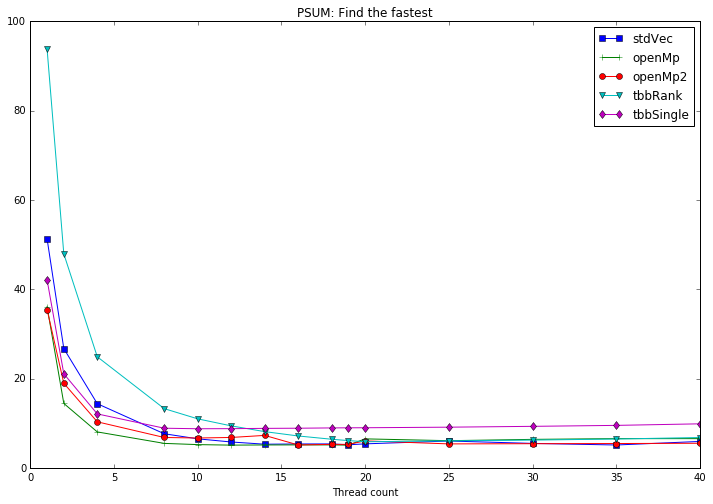

In [23]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Find the fastest'
ax.plot([x[1] for x in stdVec],[x[0] for x in stdVec],'s-',label='stdVec')
ax.plot([x[1] for x in openMp],[x[0] for x in openMp],'+-',label='openMp')
ax.plot([x[1] for x in openMp2],[x[0] for x in openMp2],'o-',label='openMp2')
ax.plot([x[1] for x in tbbRank],[x[0] for x in tbbRank],'v-',label='tbbRank')
ax.plot([x[1] for x in tbbSingle],[x[0] for x in tbbSingle],'d-',label='tbbSingle')
plt.xlabel('Thread count')
plt.title('PSUM: '+ dk)
plt.legend()
plt.show()


Lets compare the distribution values to the single run.

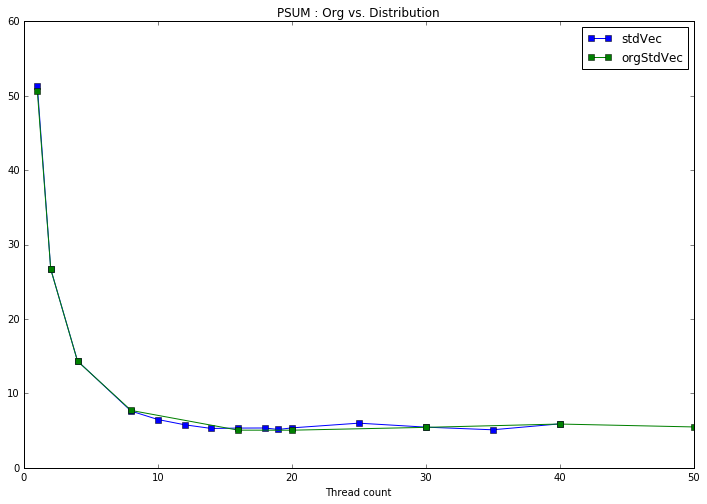

In [61]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Org vs. Distribution'
ax.plot([x[1] for x in stdVec],[x[0] for x in stdVec],'s-',label='stdVec')
ax.plot([x[1] for x in orgStdVec],[x[0] for x in orgStdVec],'s-',label='orgStdVec')
plt.xlabel('Thread count')
plt.title('PSUM : '+ dk)
plt.legend()
plt.show()

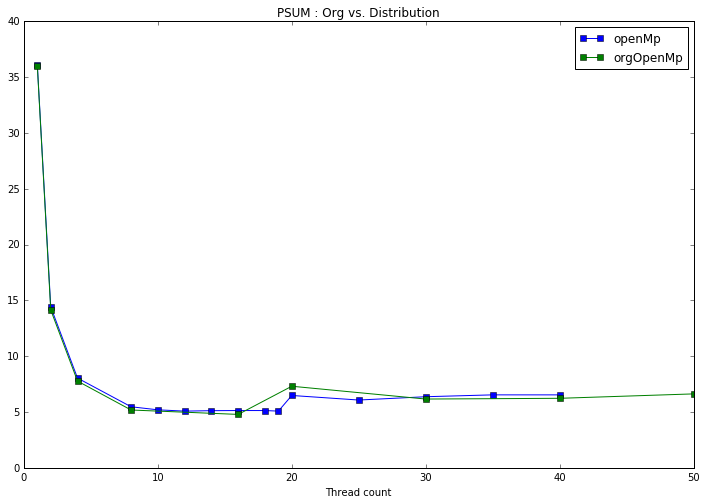

In [63]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Org vs. Distribution'
ax.plot([x[1] for x in openMp],[x[0] for x in openMp],'s-',label='openMp')
ax.plot([x[1] for x in orgOpenMp],[x[0] for x in orgOpenMp],'s-',label='orgOpenMp')
plt.xlabel('Thread count')
plt.title('PSUM : '+ dk)
plt.legend()
plt.show()

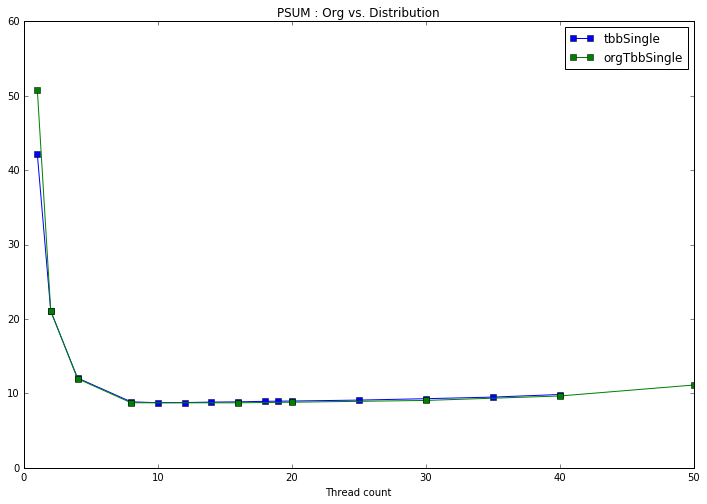

In [64]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Org vs. Distribution'
ax.plot([x[1] for x in tbbSingle],[x[0] for x in tbbSingle],'s-',label='tbbSingle')
ax.plot([x[1] for x in orgTbbSingle],[x[0] for x in orgTbbSingle],'s-',label='orgTbbSingle')
plt.xlabel('Thread count')
plt.title('PSUM : '+ dk)
plt.legend()
plt.show()

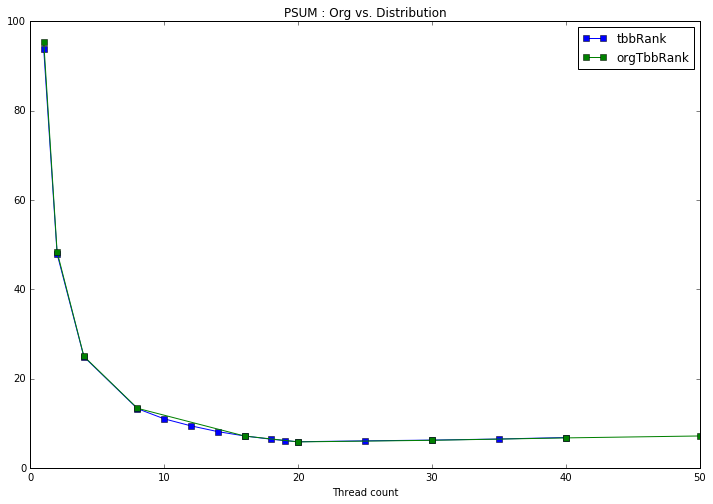

In [65]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Org vs. Distribution'
ax.plot([x[1] for x in tbbRank],[x[0] for x in tbbRank],'s-',label='tbbRank')
ax.plot([x[1] for x in orgTbbRank],[x[0] for x in orgTbbRank],'s-',label='orgTbbRank')
plt.xlabel('Thread count')
plt.title('PSUM : '+ dk)
plt.legend()
plt.show()

We see that for the "OpenMp" case there is a statiscally significant difference at the 20 thread count between the single run and distribution results. Single thread TBB implemenations also show a statiscally significant difference. The 'single run' experiment I ran happens to be very close to the mean of each implementation.  Reviewing the distributions themselves does show that is not always going to be the case.

# Conclusion
The distribution plot shows that the OpenMp imlemenation is faster in most thread counts than all the other implementations.  The suggestion of using OpenMp for this "psum" operation should be ammplified by the ease of OpenMp coding.  Implementing OpenMp tasks to handle the MPI computation/communication overlap should be explored. 
## ToDO
It is important to understand why OpenMp is better than Tbb in certain cases.  This will be the next section. 